In [92]:
%matplotlib inline
import stripy as stripy
import numpy as np
import matplotlib.pyplot as plt
import cartopy as cart
import cartopy.crs as ccrs
from itertools import combinations
import great_circle_calculator.great_circle_calculator as gcc
import sys
import pickle
sys.path.append('/science/users/4302001/arctic-connectivity/tools')
sys.path.append('/Users/daanreijnders/surfdrive/Thesis/repository/tools')
import plot
import community

In [9]:
ico0 = stripy.spherical_meshes.icosahedral_mesh(refinement_levels=0)
ico1 = stripy.spherical_meshes.icosahedral_mesh(refinement_levels=1)
ico4 = stripy.spherical_meshes.icosahedral_mesh(refinement_levels=4)

In [17]:
def intermediate_point(lat1, lat2, lon1, lon2, numintermediates=0):
    f = np.linspace(0, 1, 2+numintermediates)
    delta = np.arccos(np.sin(np.radians(lat1))*np.sin(np.radians(lat2))+np.cos(np.radians(lat1))*np.cos(np.radians(lat2))*np.cos(np.radians(lon2-lon1)))
    a = np.sin((1-f)*delta)/np.sin(delta)
    b = np.sin(f*delta) / np.sin(delta)
    x = a*np.cos(lat1)*np.cos(lon1) + b*np.cos(lat2)*np.cos(lon2)
    y = a*np.cos(lat1)*np.sin(lon1) + b*np.cos(lat2)*np.sin(lon2)
    z = a*np.sin(lat1) + b*np.sin(lat1)
    lats = np.arctan2(z, np.sqrt(x**2 + y**2))
    lons = np.arctan2(y, x)
    return lats, lons

In [31]:
londeg0 = np.degrees(ico0.lons)
latdeg0 = np.degrees(ico0.lats)
londeg0 = np.where(londeg0>180, londeg0-360, londeg0)

In [33]:
segs0 = ico0.identify_segments()

In [34]:
gcc.intermediate_point((-179, 60), (1,60), 0.5)

(90.0, 90.0)

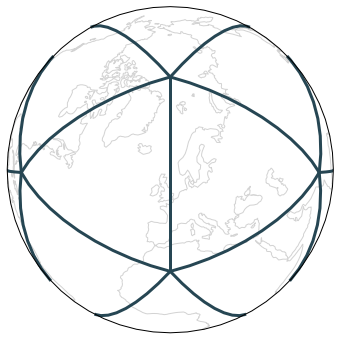

In [52]:
fig = plt.figure(figsize=(6,6,))
# ax  = plt.axes(projection=ccrs.Orthographic(central_longitude=0.0, central_latitude=60.0, globe=None))
ax = plt.axes(projection=ccrs.NearsidePerspective(central_longitude=0.0, central_latitude=60.0, satellite_height=35785831))
ax.set_global()
ax.coastlines(color="lightgrey")

for s1, s2 in segs0:
    if latdeg0[s1] > - 20 or latdeg0[s2] > -20:
        if s1 == 0:
            lonstart = londeg0[s2]
            lonend = londeg0[s2]
        elif s2 == 0:
            lonstart = londeg0[s1]
            lonend = londeg0[s1]
        else:
            lonstart = londeg0[s1]
            lonend = londeg0[s2]
        latstart = latdeg0[s1]
        latend = latdeg0[s2]
#         if lonstart + 360 - lonend < lonend - lonstart:
#             lonstart += 360
#         if abs(lonstart - 360 - lonend) < abs(lonstart - lonend):
#             lonend += 360
        lons = [lonstart]
        lats = [latstart]
        for inter in np.arange(0.1, 1, 0.1):
            loninter, latinter = gcc.intermediate_point((lonstart, latstart), (lonend,latend), inter)
            lons.append(loninter)
            lats.append(latinter)
        lons.append(lonend)
        lats.append(latend)
        ax.plot(lons, 
                lats,
                 linewidth=3, color="#264653", transform=ccrs.Geodetic())
# ax.scatter(londeg, latdeg, color="red",
#             marker="o", s=20.0, transform=ccrs.Geodetic(), zorder=500)
plt.savefig("icosahedron_on_sphere.eps", dpi=300, bbox_inches="tight", pad_inches = 0.1)

In [43]:
londeg1 = np.degrees(ico1.lons)
latdeg1 = np.degrees(ico1.lats)
londeg1 = np.where(londeg1>180, londeg1-360, londeg1)

In [44]:
segs1 = ico1.identify_segments()

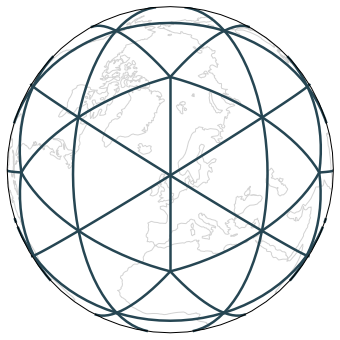

In [48]:
fig = plt.figure(figsize=(6,6,))
# ax  = plt.axes(projection=ccrs.Orthographic(central_longitude=0.0, central_latitude=60.0, globe=None))
ax = plt.axes(projection=ccrs.NearsidePerspective(central_longitude=0.0, central_latitude=60.0, satellite_height=35785831))
ax.set_global()
# ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=0.0, globe=None))
# ax.set_extent((-180,180,60,90), crs=ccrs.PlateCarree())

ax.coastlines(color="lightgrey")

for s1, s2 in segs1:
    if latdeg1[s1] > - 20 or latdeg1[s2] > -20:
        if s1 == 0:
            lonstart = londeg1[s2]
            lonend = londeg1[s2]
        elif s2 == 0:
            lonstart = londeg1[s1]
            lonend = londeg1[s1]
        else:
            lonstart = londeg1[s1]
            lonend = londeg1[s2]
        latstart = latdeg1[s1]
        latend = latdeg1[s2]
#         if abs(lonstart + 360 - lonend) < abs(lonstart - lonend):
#             lonstart += 360
#         if abs(lonstart - 360 - lonend) < abs(lonstart - lonend):
#             lonend += 360
        lons = [lonstart]
        lats = [latstart]
        for inter in np.arange(0.1, 1, 0.1):
            loninter, latinter = gcc.intermediate_point((lonstart, latstart), (lonend,latend), inter)
            lons.append(loninter)
            lats.append(latinter)
        lons.append(lonend)
        lats.append(latend)
        ax.plot(lons, 
                lats,
                 linewidth=2.5, color="#264653", transform=ccrs.Geodetic())
# ax.scatter(londeg, latdeg, color="red",
#             marker="o", s=20.0, transform=ccrs.Geodetic(), zorder=500)
plt.savefig("ico1.eps", dpi=300, bbox_inches="tight", pad_inches = 0.1)

In [50]:
londeg = np.degrees(ico4.lons)
latdeg = np.degrees(ico4.lats)
segs = ico4.identify_segments()
londeg = np.where(londeg>180, londeg-360, londeg)

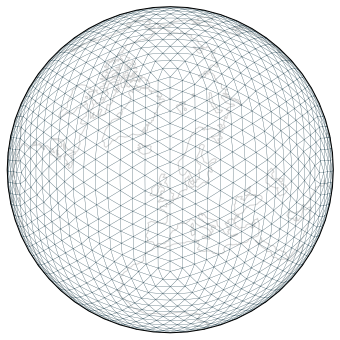

In [53]:
fig = plt.figure(figsize=(6,6,))
# ax  = plt.axes(projection=ccrs.Orthographic(central_longitude=0.0, central_latitude=60.0, globe=None))
ax = plt.axes(projection=ccrs.NearsidePerspective(central_longitude=0.0, central_latitude=60.0, satellite_height=35785831))
# ax.set_global()

# ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=0.0, globe=None))
# ax.set_extent((-180,180,60,90), crs=ccrs.PlateCarree())

ax.coastlines(color="lightgrey")

for s1, s2 in segs:
    if latdeg[s1] > - 20 or latdeg[s2] > -20:
        if s1 == 0:
            lonstart = londeg[s2]
            lonend = londeg[s2]
        elif s2 == 0:
            lonstart = londeg[s1]
            lonend = londeg[s1]
        else:
            lonstart = londeg[s1]
            lonend = londeg[s2]
        latstart = latdeg[s1]
        latend = latdeg[s2]
        lons = [lonstart]
        lats = [latstart]
        for inter in np.arange(0.1, 1, 0.1):
            loninter, latinter = gcc.intermediate_point((lonstart, latstart), (lonend,latend), inter)
            lons.append(loninter)
            lats.append(latinter)
        lons.append(lonend)
        lats.append(latend)
        ax.plot(lons, 
                lats,
                 linewidth=0.3, color="#264653", transform=ccrs.Geodetic())
# ax.scatter(londeg, latdeg, color="red",
#             marker="o", s=20.0, transform=ccrs.Geodetic(), zorder=500)
plt.savefig("ico4.eps", dpi=300, bbox_inches="tight", pad_inches = 0.1)

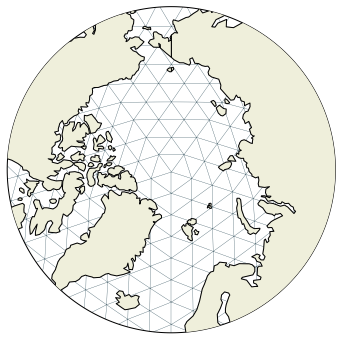

In [56]:
from matplotlib import path as mpath
def set_circular_boundary(ax):
    theta = np.linspace(0, 2*np.pi, 400)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax.set_boundary(circle, transform=ax.transAxes)
    return circle
fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=0.0, globe=None))
ax.set_extent((-180,180,60,90), crs=ccrs.PlateCarree())
ax.coastlines(color="lightgrey")
ax.add_feature(cart.feature.LAND, zorder=5, edgecolor='k')
circle_clip = set_circular_boundary(ax)
for s1, s2 in segs:
    if latdeg[s1] > - 20 or latdeg[s2] > -20:
        if s1 == 0:
            lonstart = londeg[s2]
            lonend = londeg[s2]
        elif s2 == 0:
            lonstart = londeg[s1]
            lonend = londeg[s1]
        else:
            lonstart = londeg[s1]
            lonend = londeg[s2]
        latstart = latdeg[s1]
        latend = latdeg[s2]
        lons = [lonstart]
        lats = [latstart]
        for inter in np.arange(0.1, 1, 0.1):
            loninter, latinter = gcc.intermediate_point((lonstart, latstart), (lonend,latend), inter)
            lons.append(loninter)
            lats.append(latinter)
        lons.append(lonend)
        lats.append(latend)
        ax.plot(lons, 
                lats,
                 linewidth=0.3, color="#264653", transform=ccrs.Geodetic())
# ax.scatter(londeg, latdeg, color="red",
#             marker="o", s=20.0, transform=ccrs.Geodetic(), zorder=500)
plt.savefig("ico4_polar.eps", dpi=300, bbox_inches="tight", pad_inches = 0.1)

In [61]:
with open('/Users/daanreijnders/Datasets/Meshes/ico_mesh_hex_r5.pickle', 'rb') as meshPick:
    meshDict = pickle.load(meshPick)
myBins = community.hexCountBins(meshDict['points'], 
                                np.degrees(meshDict['lons']), 
                                np.degrees(meshDict['lats']), 
                                meshDict['permutation'], 
                                meshDict['simplices'])
myMask = community.hexMask(myBins, -180, 180, 60, 90)
myMask.growToLevel(4)
myBins.calculate_voronoi(myMask, innerMaskLevel=2, outerMaskLevel=3)

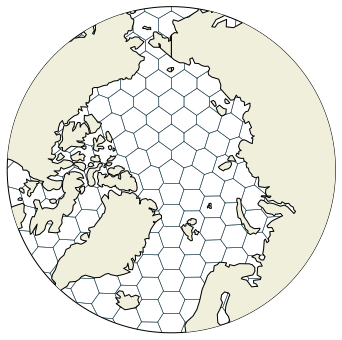

In [95]:
fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=0.0, globe=None))
ax.set_extent((-180,180,60,90), crs=ccrs.PlateCarree())
ax.coastlines(color="lightgrey")
ax.add_feature(cart.feature.LAND, zorder=5, edgecolor='k')
circle_clip = set_circular_boundary(ax)
for simplex in myBins.svSimplices:
    if myBins.svTriLats[simplex[0]]>50 and myBins.svTriLats[simplex[1]]>50 and myBins.svTriLats[simplex[1]]>50:
        plt.plot([myBins.svTriLons[simplex[1]], myBins.svTriLons[simplex[2]]],
                 [myBins.svTriLats[simplex[1]], myBins.svTriLats[simplex[2]]],
                 linewidth=0.5, 
                 color="#264653",
                 transform=ccrs.Geodetic())
plt.savefig("voronoi_ico4.eps", dpi=300, bbox_inches="tight", pad_inches = 0.1)